# Demo: Overfitting, Weight-Regularization

In [57]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Plot polynomial

Here we plot the polynomial curve $f(x) = 5x^3 + x^2 - 2x - 0.5$.

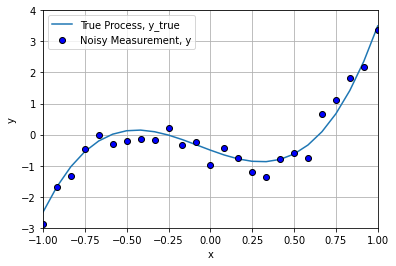

In [58]:
nsamp = 25 # number of samples taken
p = np.array([5,1,-2,-.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

In [60]:
# train test validation split
ntrain = 15
nval = 5
ntest = 5

inds = np.random.permutation(nsamp)

train_choices = inds[:ntrain]
val_choices = inds[ntrain:ntrain+nval]
test_choices = inds[ntrain+nval:]

xtrain, ytrain = x[train_choices], y[train_choices]
xval, yval     = x[val_choices], y[val_choices]
xtest, ytest   = x[test_choices], y[test_choices]
xtrain

array([ 0.08333333,  0.91666667, -0.91666667,  0.5       , -0.41666667,
        0.58333333,  0.66666667,  0.16666667, -0.83333333,  0.25      ,
       -0.16666667, -0.75      , -1.        ,  0.41666667, -0.66666667])

### Design Matrix

We have the design matrix as $D = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^{M}\\
1 & x_2 & x_2^2 & x_2^3 & \cdots & x_2^{M}\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\ 
1 & x_n & x_n^2 & x_n^3 & \cdots & x_n^{M}
\end{bmatrix}$

- Complete the design matrix and set M = 25, the shape of the design matrix should be (15, 26)

In [65]:
# forming the design matrix
# features x, model order M

def design_matrix(x, M):
    # TODO
    x = x.reshape(-1, 1)
    Design_Matrix = np.power(x, np.arange(M+1))
    return Design_Matrix


M = 25
Xtrain = design_matrix(xtrain, M)
print(Xtrain.shape)

(15, 26)


Train MSE: 1.428997935882091e-25
Test MSE: 2276225.0463959184


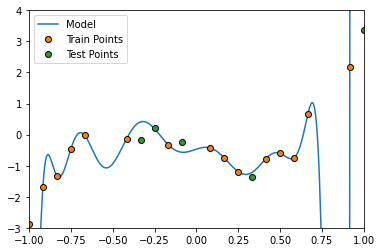

w = 
[[    0.  ]
 [    1.79]
 [   -5.26]
 [ -148.14]
 [  112.35]
 [ 1532.  ]
 [ -648.66]
 [-5715.33]
 [  910.73]
 [ 7630.46]
 [  949.64]
 [  659.77]
 [-1098.63]
 [-4460.23]
 [-1288.68]
 [-3678.84]
 [ -821.86]
 [ -583.34]
 [ -464.85]
 [ 1951.  ]
 [   28.39]
 [ 2819.1 ]
 [ 1090.17]
 [ 1958.91]
 [ 2924.17]
 [ -277.22]]


In [67]:
from sklearn import linear_model

# TODO
# fit the polynomial model using linear regression 
regr = linear_model.LinearRegression()
regr.fit(Xtrain, ytrain)


# print the training error MSE
yhat_train = regr.predict(Xtrain)
MSE_train = np.mean((yhat_train - ytrain)**2)
print("Train MSE: {}".format(MSE_train))


# print the test error MSE
yhat_test = regr.predict(design_matrix(xtest, M))
MSE_test = np.mean((yhat_test - ytest)**2)
print("Test MSE: {}".format(MSE_test))



# plotting
x_line = np.linspace(-1,1,500).reshape(-1,1)
X_line = design_matrix(x_line, M)
y_line = regr.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['Model','Train Points', 'Test Points'])
plt.show()

w = regr.coef_

print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

### weight based regularization

- Lasso: L1 norm regularizer $\displaystyle\frac{1}{2n_\mathrm{samples}}\|y - Xw\|^2_2 + \alpha\|w\|_1$


- Ridge: L2 norm regularizer $\displaystyle\|y - Xw\|^2_2 + \alpha\|w\|^2_2$

Train MSE: 0.07027919071446748
Val RMSE = 0.15463060537019846
Test MSE: 0.1732711601486664


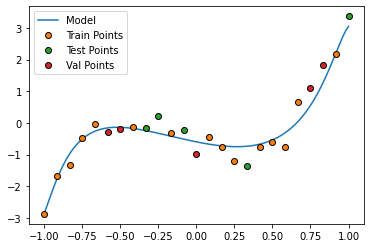

w = 
[[-0.6 ]
 [-0.97]
 [ 0.95]
 [ 1.87]
 [ 0.42]
 [ 1.4 ]
 [-0.04]
 [ 0.8 ]
 [-0.19]
 [ 0.38]
 [-0.18]
 [ 0.12]
 [-0.13]
 [-0.02]
 [-0.08]
 [-0.09]
 [-0.03]
 [-0.12]
 [-0.01]
 [-0.13]
 [-0.  ]
 [-0.11]
 [-0.  ]
 [-0.09]
 [-0.01]
 [-0.07]]


In [68]:
# TODO

# Using the following models to fit the data
# reg = linear_model.Lasso(alpha=.02, fit_intercept=False)
reg = linear_model.Ridge(alpha=.05, fit_intercept=False)

reg.fit(Xtrain, ytrain)
w = reg.coef_


# print the training error MSE
# yhat_train = regr.predict(Xtrain)
yhat_train = Xtrain@w
MSE_train = np.mean((yhat_train - ytrain)**2)
print("Train MSE: {}".format(MSE_train))


# print the validation error MSE
Xval = design_matrix(xval, M)
yhat = reg.predict(Xval)
MSE_val = np.mean((yval-yhat)**2)
print("Val RMSE = {}".format(MSE_val))


# print the testing error MSE
yhat_test = reg.predict(design_matrix(xtest, M))
MSE_test = np.mean((yhat_test - ytest)**2)
print("Test MSE: {}".format(MSE_test))


# plotting
x_line = np.linspace(-1,1,500).reshape(-1,1)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.plot(xval,yval,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points', 'Val Points'])
plt.show()

print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))